<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center><b>Bachelor of Ecole Polytechnique</b></center>
<center>MAA106: Introduction to Numerical Analysis, year 1, semester 2</center>
<center>Authors: Zhihui Li and Kevin Messali</center>
<br>
<center><i>Approximation of periodic functions</i></center>

# Approximation of periodic functions

&nbsp;

In [17]:
import numpy as np
import scipy.integrate as integrate
from scipy.linalg import solve as l_solve
import matplotlib.pyplot as plt

an_f1(10): 3.898171832519376e-17
bn_f1(n): 0


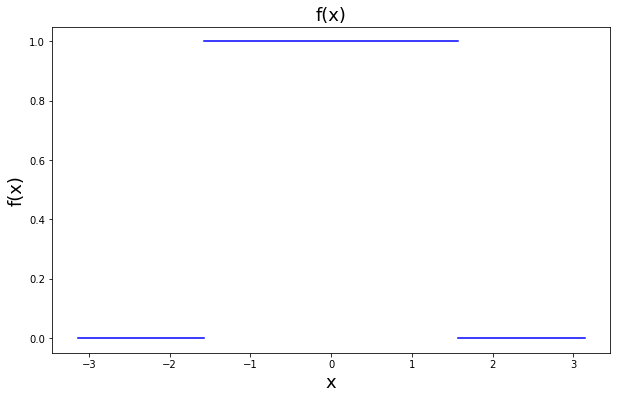

In [11]:
"""
Definition of f: f is a 2-pi periodic even function on (-pi, pi] defined such that f(x) = 1 if x belongs to [-pi/2, pi/2] and f(x) = -1 otherwise.
"""
X_1 = np.linspace(-np.pi/2, np.pi/2, 100)
Y_1 = np.ones(100)
X_2 = np.linspace(-np.pi, -np.pi/2, 100)
X_3 = np.linspace(np.pi/2, np.pi, 100)
Y_2 = np.zeros(100)

def an_f1(n):
    """
    We get a convergence for the coefficient a_n as n tends to infinity to 0 by trigonometric limits of the form sin(x)/x as x tends to infinity.
    """
    return 2*np.sin(n*np.pi/2)/(n*np.pi)

def bn_f1(n):
    """
    Since f is an even function, by remark 1.2 b_n is 0.
    """
    return 0


n = 10
print(f'an_f1(10): {an_f1(n)}') # Convergent to 0
print(f'bn_f1(n): {bn_f1(n)}')  # Getting 0 as expected because f is even

plt.figure(figsize=(10, 6))
plt.plot(X_1, Y_1, color="blue") # plot the graph of f(x)
plt.plot(X_2, Y_2, color="blue")
plt.plot(X_3, Y_2, color="blue")
plt.xlabel('x', fontsize = 18)
plt.ylabel('f(x)', fontsize = 18)
plt.title('f(x)', fontsize = 18)
plt.show()

an_f2(10): -0.012732395447351136
bn_f2(n): 0


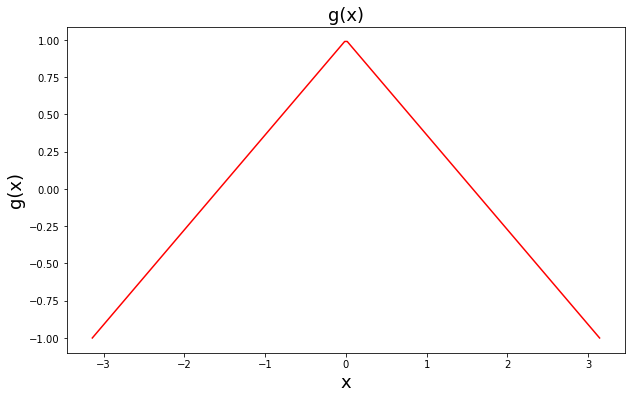

In [12]:
"""
Definition of g: g is a 2-pi periodic even function on (-pi, pi] defined such that g(x) = 1 - (2 * abs(x)/pi)
"""

def g(x):
    return 1 - (2*(np.abs(x)/np.pi))


def an_f2(n):
    """
    We get a convergence for the coefficient a_n as n tends to infinity to 0. 
    """
    return ((-4)/(np.pi * n ** 2)) * (np.pi*n*np.sin(np.pi * n) + np.cos(np.pi * n))


def bn_f2(n):
    """
    Since g is an even function, by remark 1.2 b_n is 0.
    """
    return 0


n = 10
print(f'an_f2(10): {an_f2(n)}') # Convergent to 0
print(f'bn_f2(n): {bn_f2(n)}') # Getting 0 as expected because g is even

X = np.linspace(-np.pi, np.pi, 200)
plt.figure(figsize=(10, 6))
plt.plot(X, g(X), color="red") # plot the graph of g(x)
plt.xlabel('x', fontsize = 18)
plt.ylabel('g(x)', fontsize = 18)
plt.title('g(x)', fontsize = 18)
plt.show()

In [13]:

def an_f(f, n):
    """
    We used scipy.integrate to calculate the integral
    scipy.integrate() returns a tuple,
    where the first element holding the estimated value of the integral
    and the second element holding an upper bound on the error
    """
    subresult = integrate.quad(lambda x: f(x)*np.cos(n*x), -np.pi, np.pi)[0]
    return (1/(2*np.pi))*subresult

def bn_f(f, n):
    """
    We used scipy.integrate to calculate the integral
    scipy.integrate() returns a tuple,
    where the first element holding the estimated value of the integral
    and the second element holding an upper bound on the error
    """
    subresult = integrate.quad(lambda x: f(x)*np.sin(n*x), -np.pi, np.pi)[0]
    return (1/(2*np.pi))*subresult


def truncated_fourier_series(f, x, N):
    """
    temp: variable used to store the truncated sum
    range(1,n): compute sum from n=1 to n=N-1
    """
    a_0 = an_f(f, 0)
    temp = a_0
    for i in range(1,N):
        a_i = an_f(f, i)
        b_i = bn_f()
        temp += 2*(a_i*np.cos(i*x) + b_i*np.sin(i*x))
    return temp


n = 10
print(f'an_g(10): {an_f(g, n)}')
print(f'bn_g(10): {bn_f(g, n)}')

X = np.linspace(-np.pi, np.pi, 200)
plt.figure(figsize=(10, 6))
plt.plot(X, truncated_fourier_series(g, X, n), color="red")
plt.xlabel('x', fontsize = 18)
plt.ylabel('g(x)', fontsize = 18)
plt.title('Truncated fourier series', fontsize = 18)
plt.show()

an_g(10): 5.32958474136205e-17
bn_g(10): 0.0


TypeError: bn_f() missing 2 required positional arguments: 'f' and 'n'

### Study of decay of the Fourier coefficients (the rate at which they go to 0)

In [ ]:
n = 15
N = np.arange(1, n)
X = np.linspace(-np.pi, np.pi, 100)
a_n = list()
b_n = list()
error_n = list()

def g(x):
    return np.sin(x) ** 2

for i in N:
    a_n.append(an_f(g, i))
    b_n.append(bn_f(g, i))
    error_n.append( max(np.abs(g(X)-truncated_fourier_series(g, X, i))) )
    # error_n.append(integrate.quad(lambda x: g(x) - truncated_fourier_series(g, x, i), -np.pi, np.pi)[0]) 
    

plt.figure(figsize=(10, 6))
plt.plot(N, a_n, label='$a_n$')
plt.plot(N, b_n, label='$b_n$')
plt.xlabel('n', fontsize = 18)
plt.ylabel('values of $a_n$ and $b_n$', fontsize = 18)
plt.legend(loc='upper right')
plt.title('Study of decay of the Fourier coefficients for g(x)', fontsize = 18)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(N, error_n, label='absolute error over domain')
plt.xlabel('n', fontsize = 18)
plt.ylabel('absolute value error over interval [$-\pi$,  $\pi$]', fontsize = 18)
plt.legend(loc='upper right')
plt.title('Study of error $S_n$(g)', fontsize = 18)
plt.show()

print(a_n)
print(error_n)

For regular functions that are 2$\pi$-periodic, we see a direct link between the decay of the coefficients and the error.Indeed see that the are both converging directly to 0 at the same n. This can be explained by the definition of truncated Fourier series: if the coefficient decays to 0, this means the current term of the sum decays to 0, which means the error between the truncated Fourier series and the origional function tends to 0. For function that are not 2$\pi$-periodic we
observe that their coefficients converge slower and that the error takes more time to get to 0.
We observe that for very smooth functions, we have a very fast decay of the coefficients and therefore of the error.

This can be explained by the definition of truncated Fourier series: if the coefficient decays to 0, this means the current term of the sum decays to 0, which means the error between the truncated Fourier series and the origional function tends to 0.

# Section 2

In [16]:
N = 100

f_hat = np.arange(N)

def X_k(k):
    return (2*k + 1) * np.pi / (2 * N)

def f(X):
    ...
def Pn(x):
    f_0 = f_hat[0]
    temp = f_0
    for i in range(1,N):
        temp += 2*(f_hat[i] * np.cos(i * x))
    return temp



In [ ]:
l_solve()